Name-Vipul Anand
Assignment-Baseball Case Study
Batch-DS2312

Problem Statement-
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Output: Number of predicted wins (W)

In [1]:
#Importing the various library for different tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.shape

(30, 17)

There are 30 columns in this dataset which is less but we have to make the model out of this only

In [5]:
data['W'].value_counts()

W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64

The unique values in each and every column

In [6]:
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [7]:
data['ER'].value_counts()

ER
601    1
653    1
655    1
659    1
597    1
553    1
749    1
698    1
638    1
577    1
557    1
700    1
682    1
546    1
532    1
478    1
664    1
677    1
630    1
572    1
680    1
694    1
604    1
646    1
652    1
609    1
746    1
643    1
584    1
799    1
Name: count, dtype: int64

In [8]:
data['RA'].value_counts()

RA
641    1
700    1
731    1
713    1
627    1
595    1
809    1
760    1
678    1
635    1
613    1
754    1
737    1
608    1
596    1
525    1
729    1
726    1
675    1
618    1
733    1
753    1
642    1
693    1
698    1
670    1
803    1
701    1
640    1
844    1
Name: count, dtype: int64

so in this column i think all the columns are of same use and we do not need to drop any of those here

In [9]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

zero null values in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the columns are either float or int64 none of them have a object datatype

<Axes: >

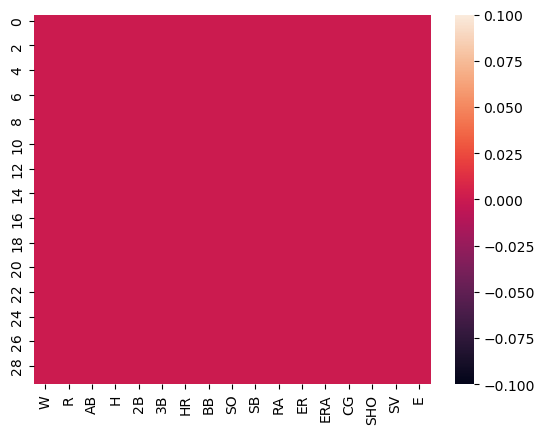

In [11]:
sns.heatmap(data.isna())

The heatmap also shows the data set has no nulls at all

Description of the dataset

In [13]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Most of the columns are looking like they have a normal distribution 
We will know the exact scenerio when we will visualize the data

univarate analysis

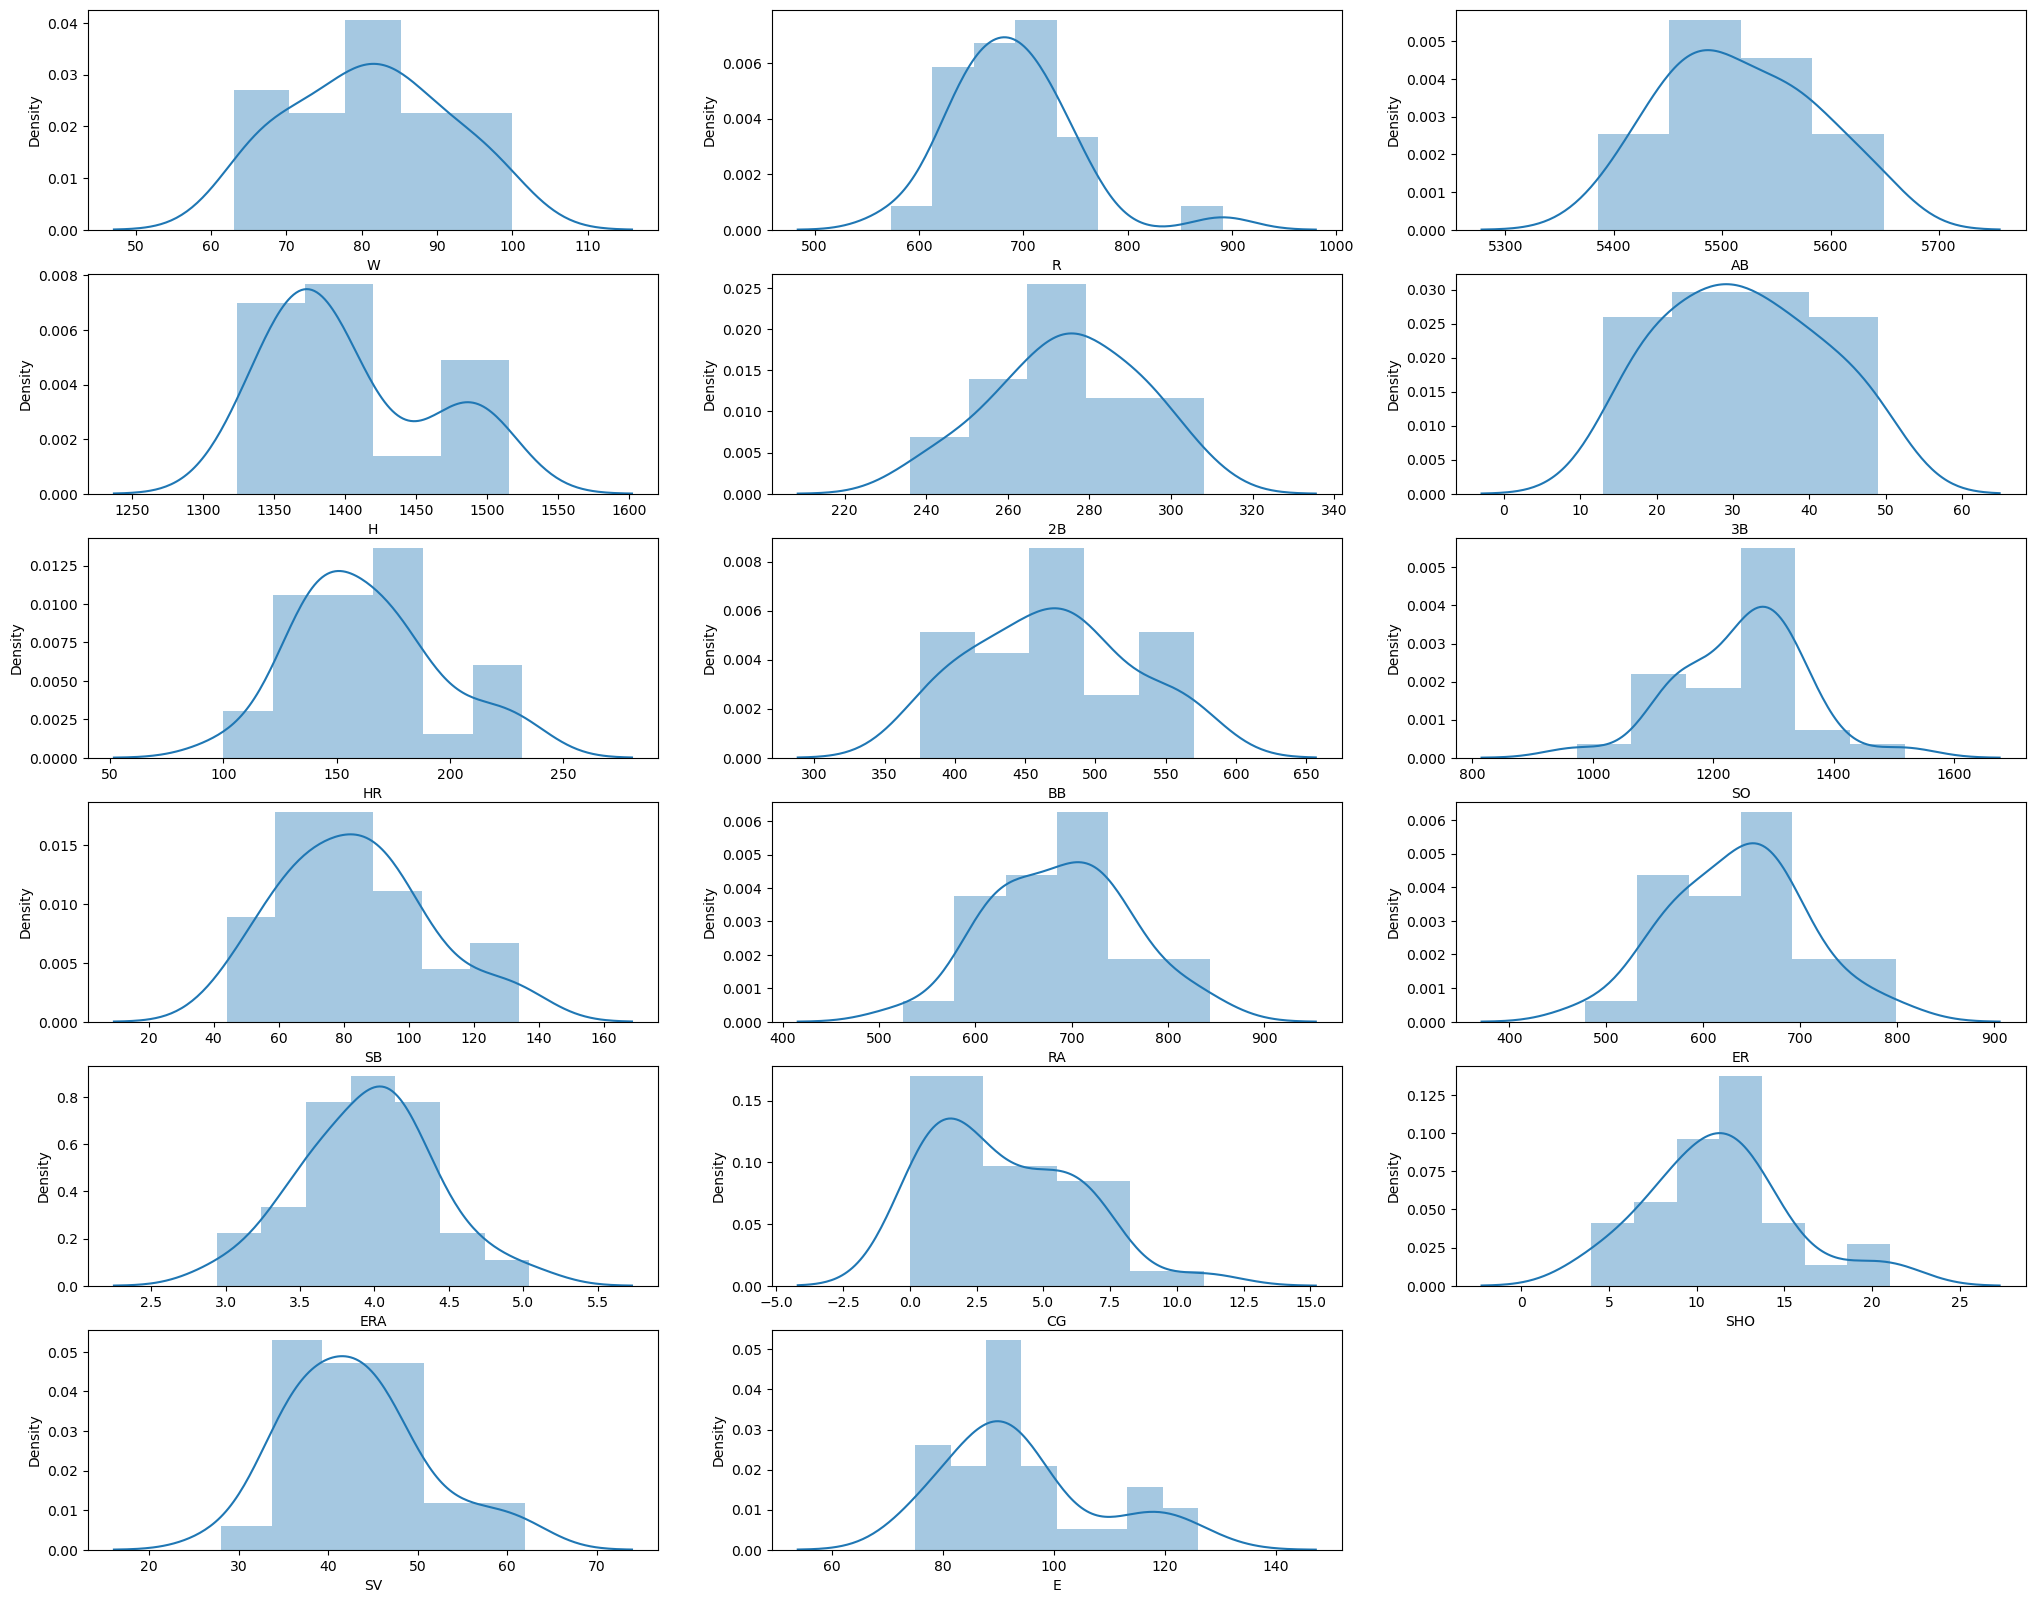

In [14]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

So all the data looks like normal distribution
Let us see the box to visualize which column has outliers

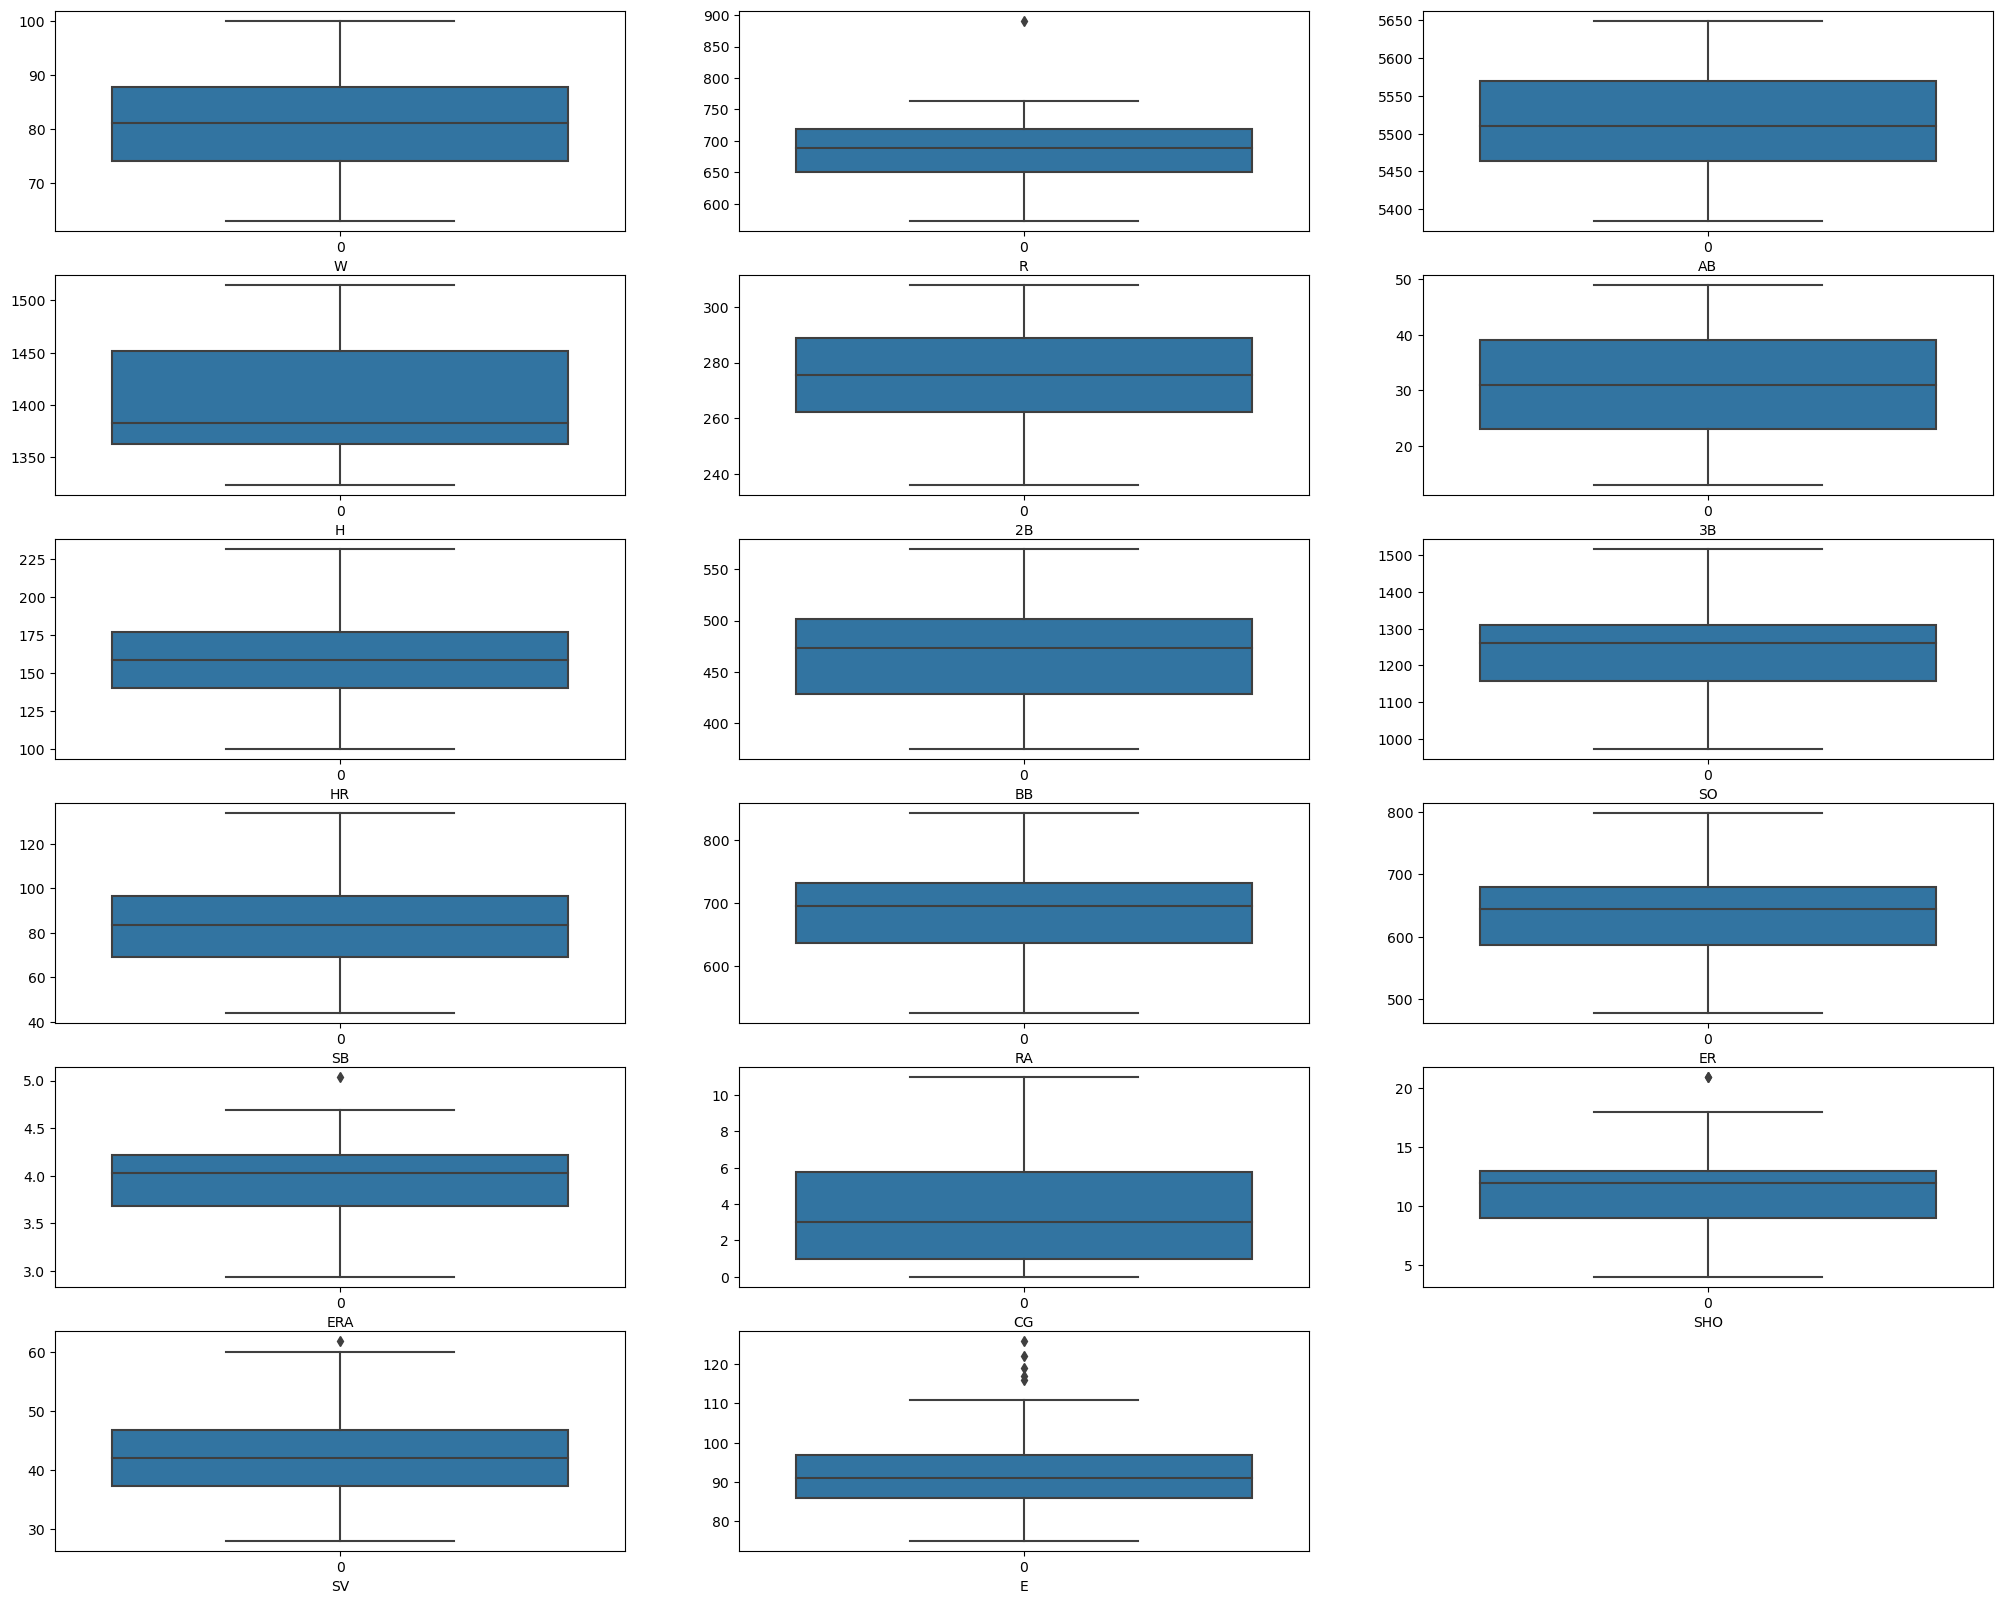

In [15]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Let us first do the analysis part we will remove the outliers after this

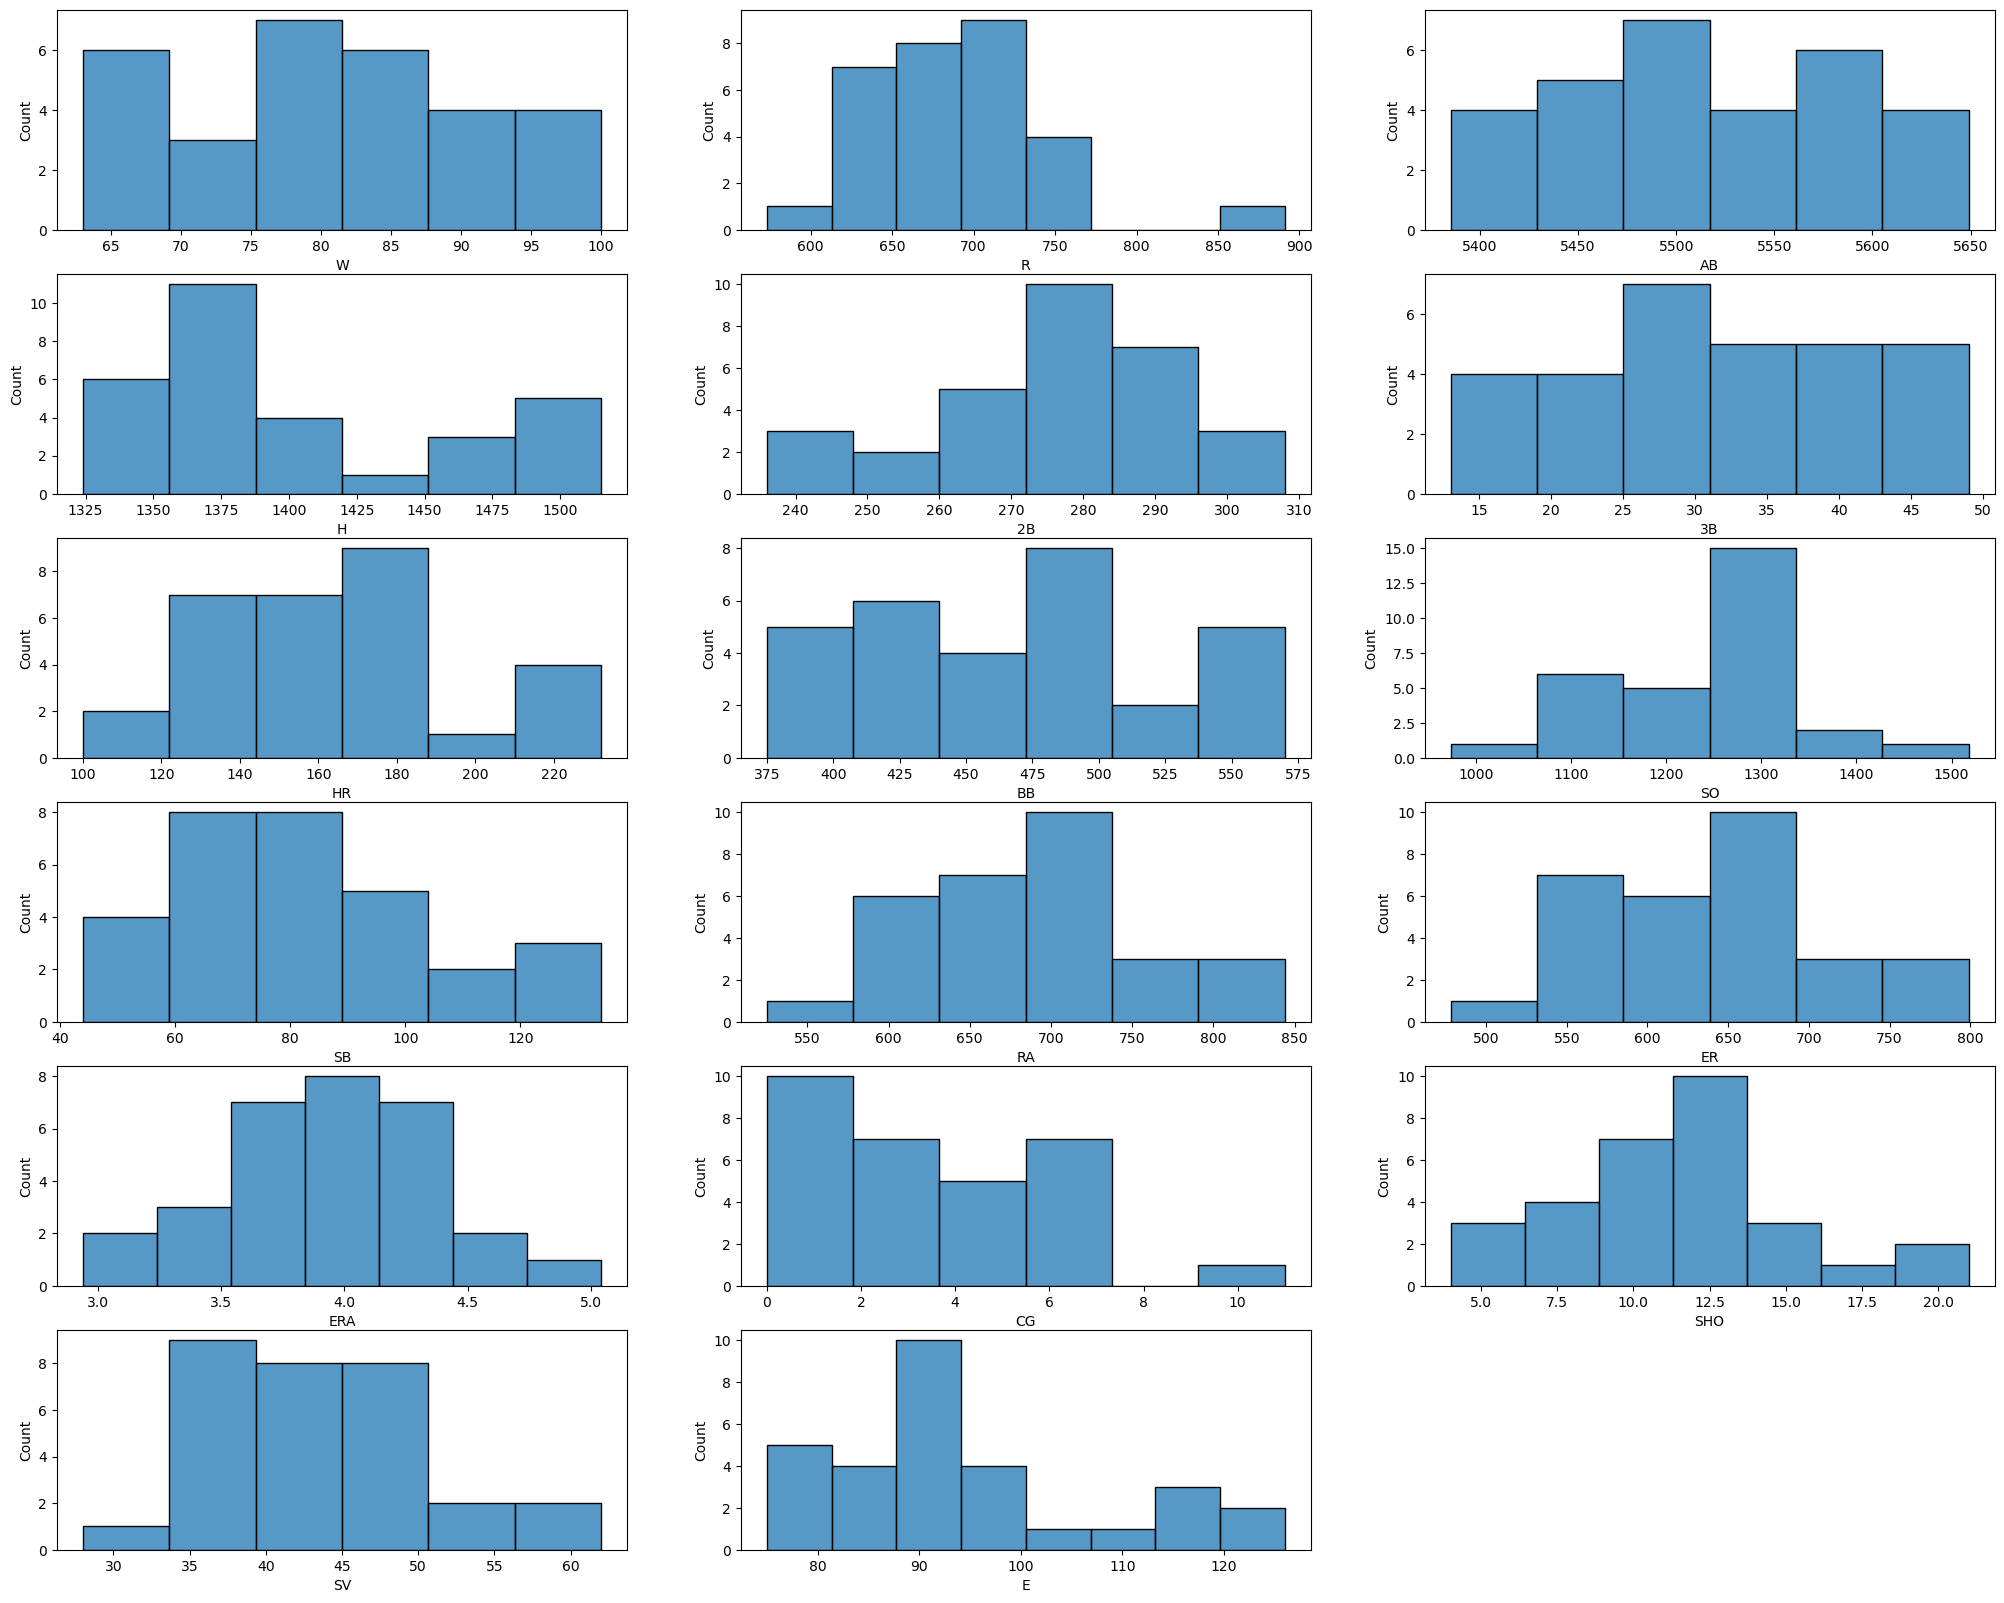

In [16]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.histplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Let us now visualize the relation of different columns with the label
Bivarate analysis

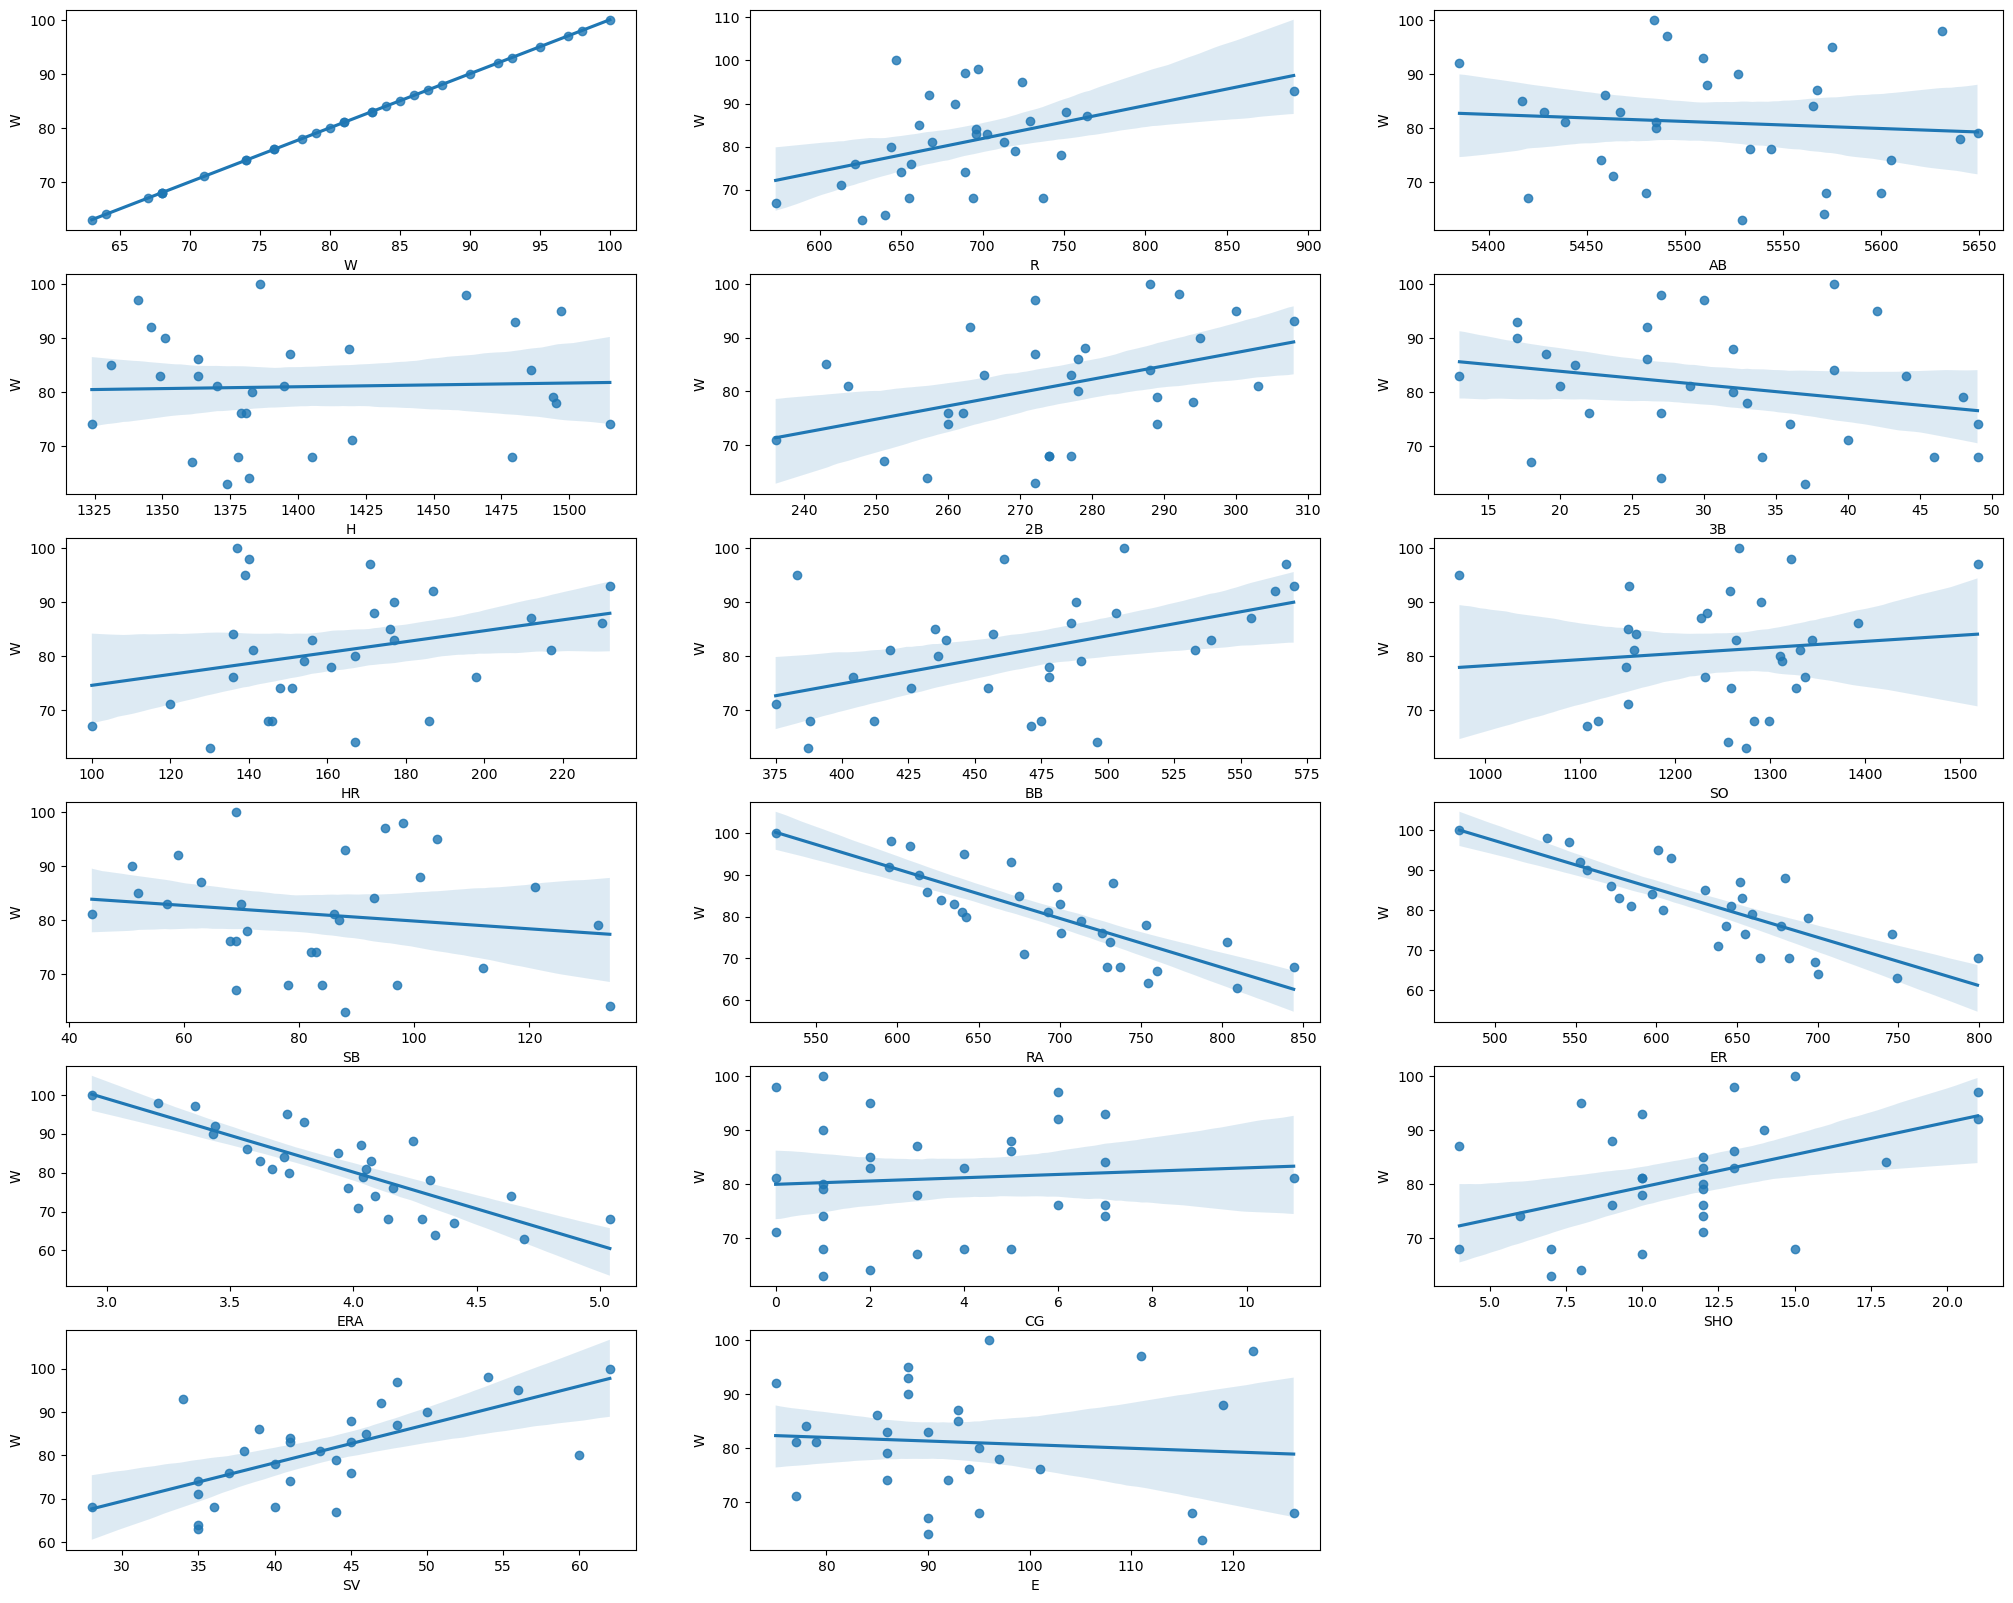

In [17]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.regplot(x=data[i],y=data['W'])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

We have used the regplot as it shows the direction along witht the scatter plot

One thing we can clearly see here is that some columns have negative and some have positive relation with the label

Let us see the heatmap to see which column has what kind of relation with the label

In [18]:
corr=data.corr()

<Axes: >

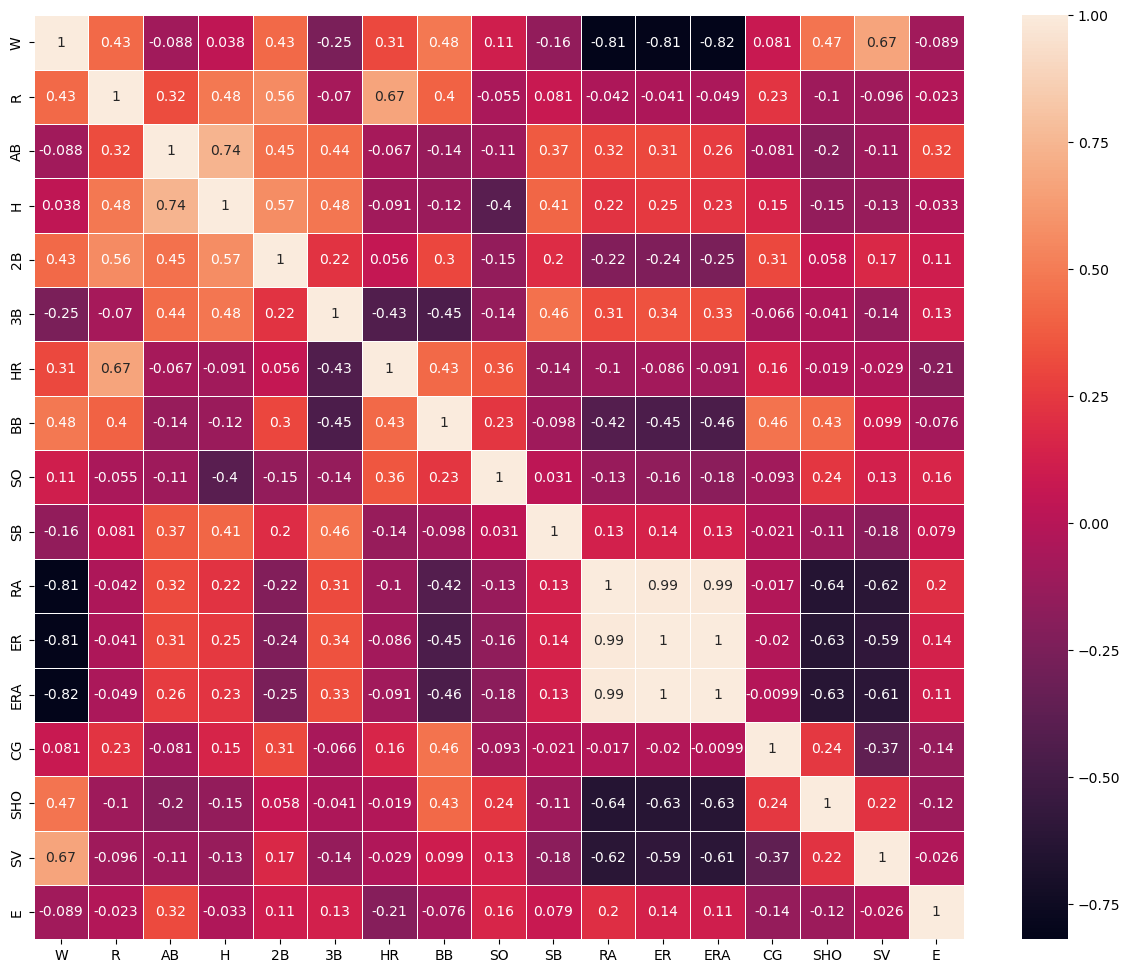

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,linewidths=0.4)

Here 3 columns are having very high relation let us visualize them after that we can delete some of them for a better model

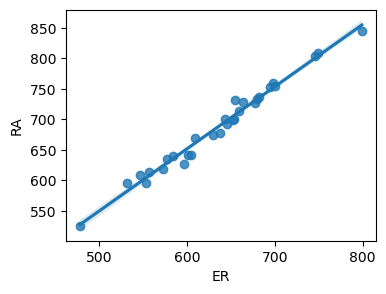

In [20]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ER'],y=data['RA'])
plt.show()

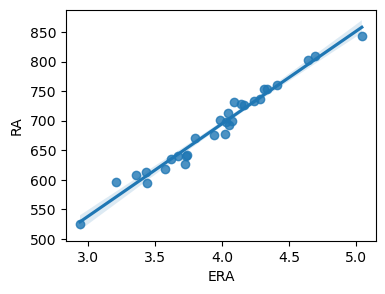

In [23]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['RA'])
plt.show()

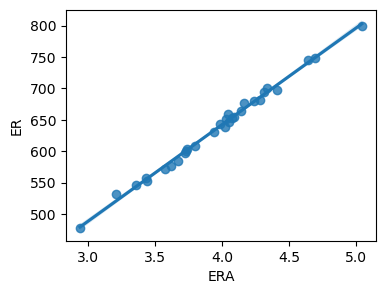

In [24]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['ER'])
plt.show()

It seems to be a very high relation between them 
We will have to drop 2 of them any how
We will see which has more relation with the label afterthat we will drop 

In [25]:
data[['ER','RA','ERA','W']].corr()

,ER,RA,ERA,W
ER,1.000000,0.991018,0.997248,-0.809435
RA,0.991018,1.000000,0.986674,-0.812952
ERA,0.997248,0.986674,1.000000,-0.819600
W,-0.809435,-0.812952,-0.819600,1.000000


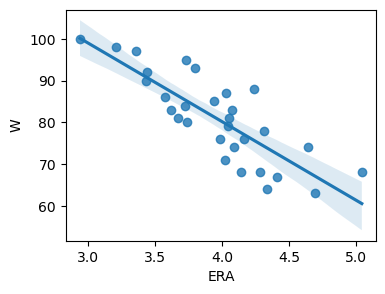

In [26]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ERA'],y=data['W'])
plt.show()

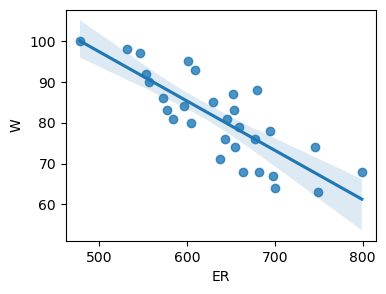

In [27]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['ER'],y=data['W'])
plt.show()

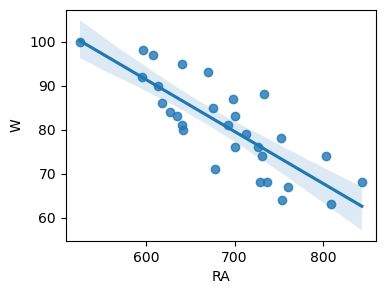

In [28]:
plt.figure(figsize=(4,3))
sns.regplot(x=data['RA'],y=data['W'])
plt.show()

`More or less they have the same relation with the label also
The era had a little bit higher relation than remaining other so we will keep it and drop other

In [29]:
data=data.drop(columns=['ER','RA'])

In [30]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [31]:
corr=data.corr()

<Axes: >

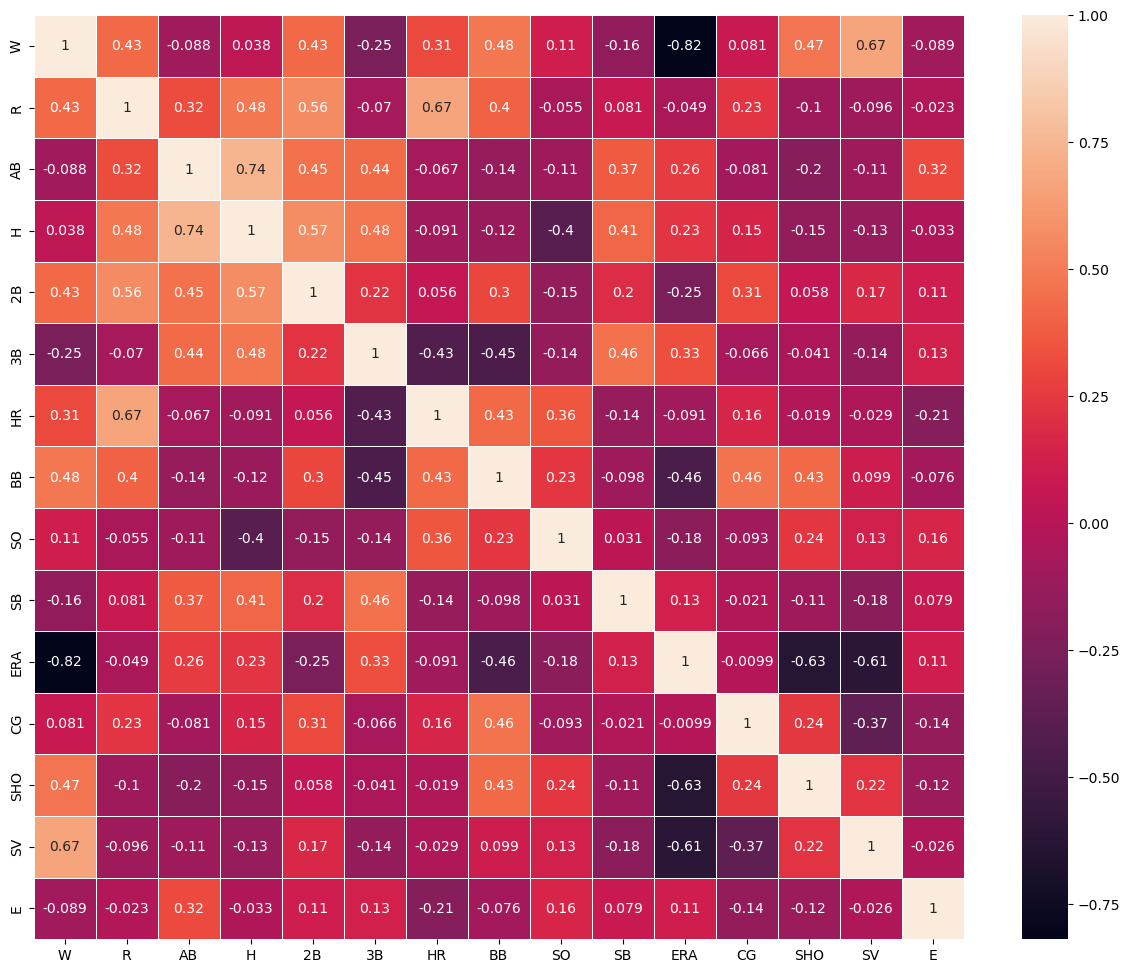

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,linewidths=0.4)

There is a relation between ab and h also 
Let us visualize this also

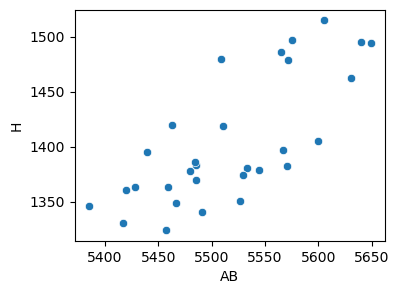

In [32]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=data['AB'],y=data['H'])
plt.show()

The relation is there but not that much big 
So we will keep these two both instead of deleting

In [33]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [34]:
corr['W'].sort_values()

ERA   -0.819600
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

We can see all the features are related to the label in a positive or in a negative way also

Let us now treat the outiers 

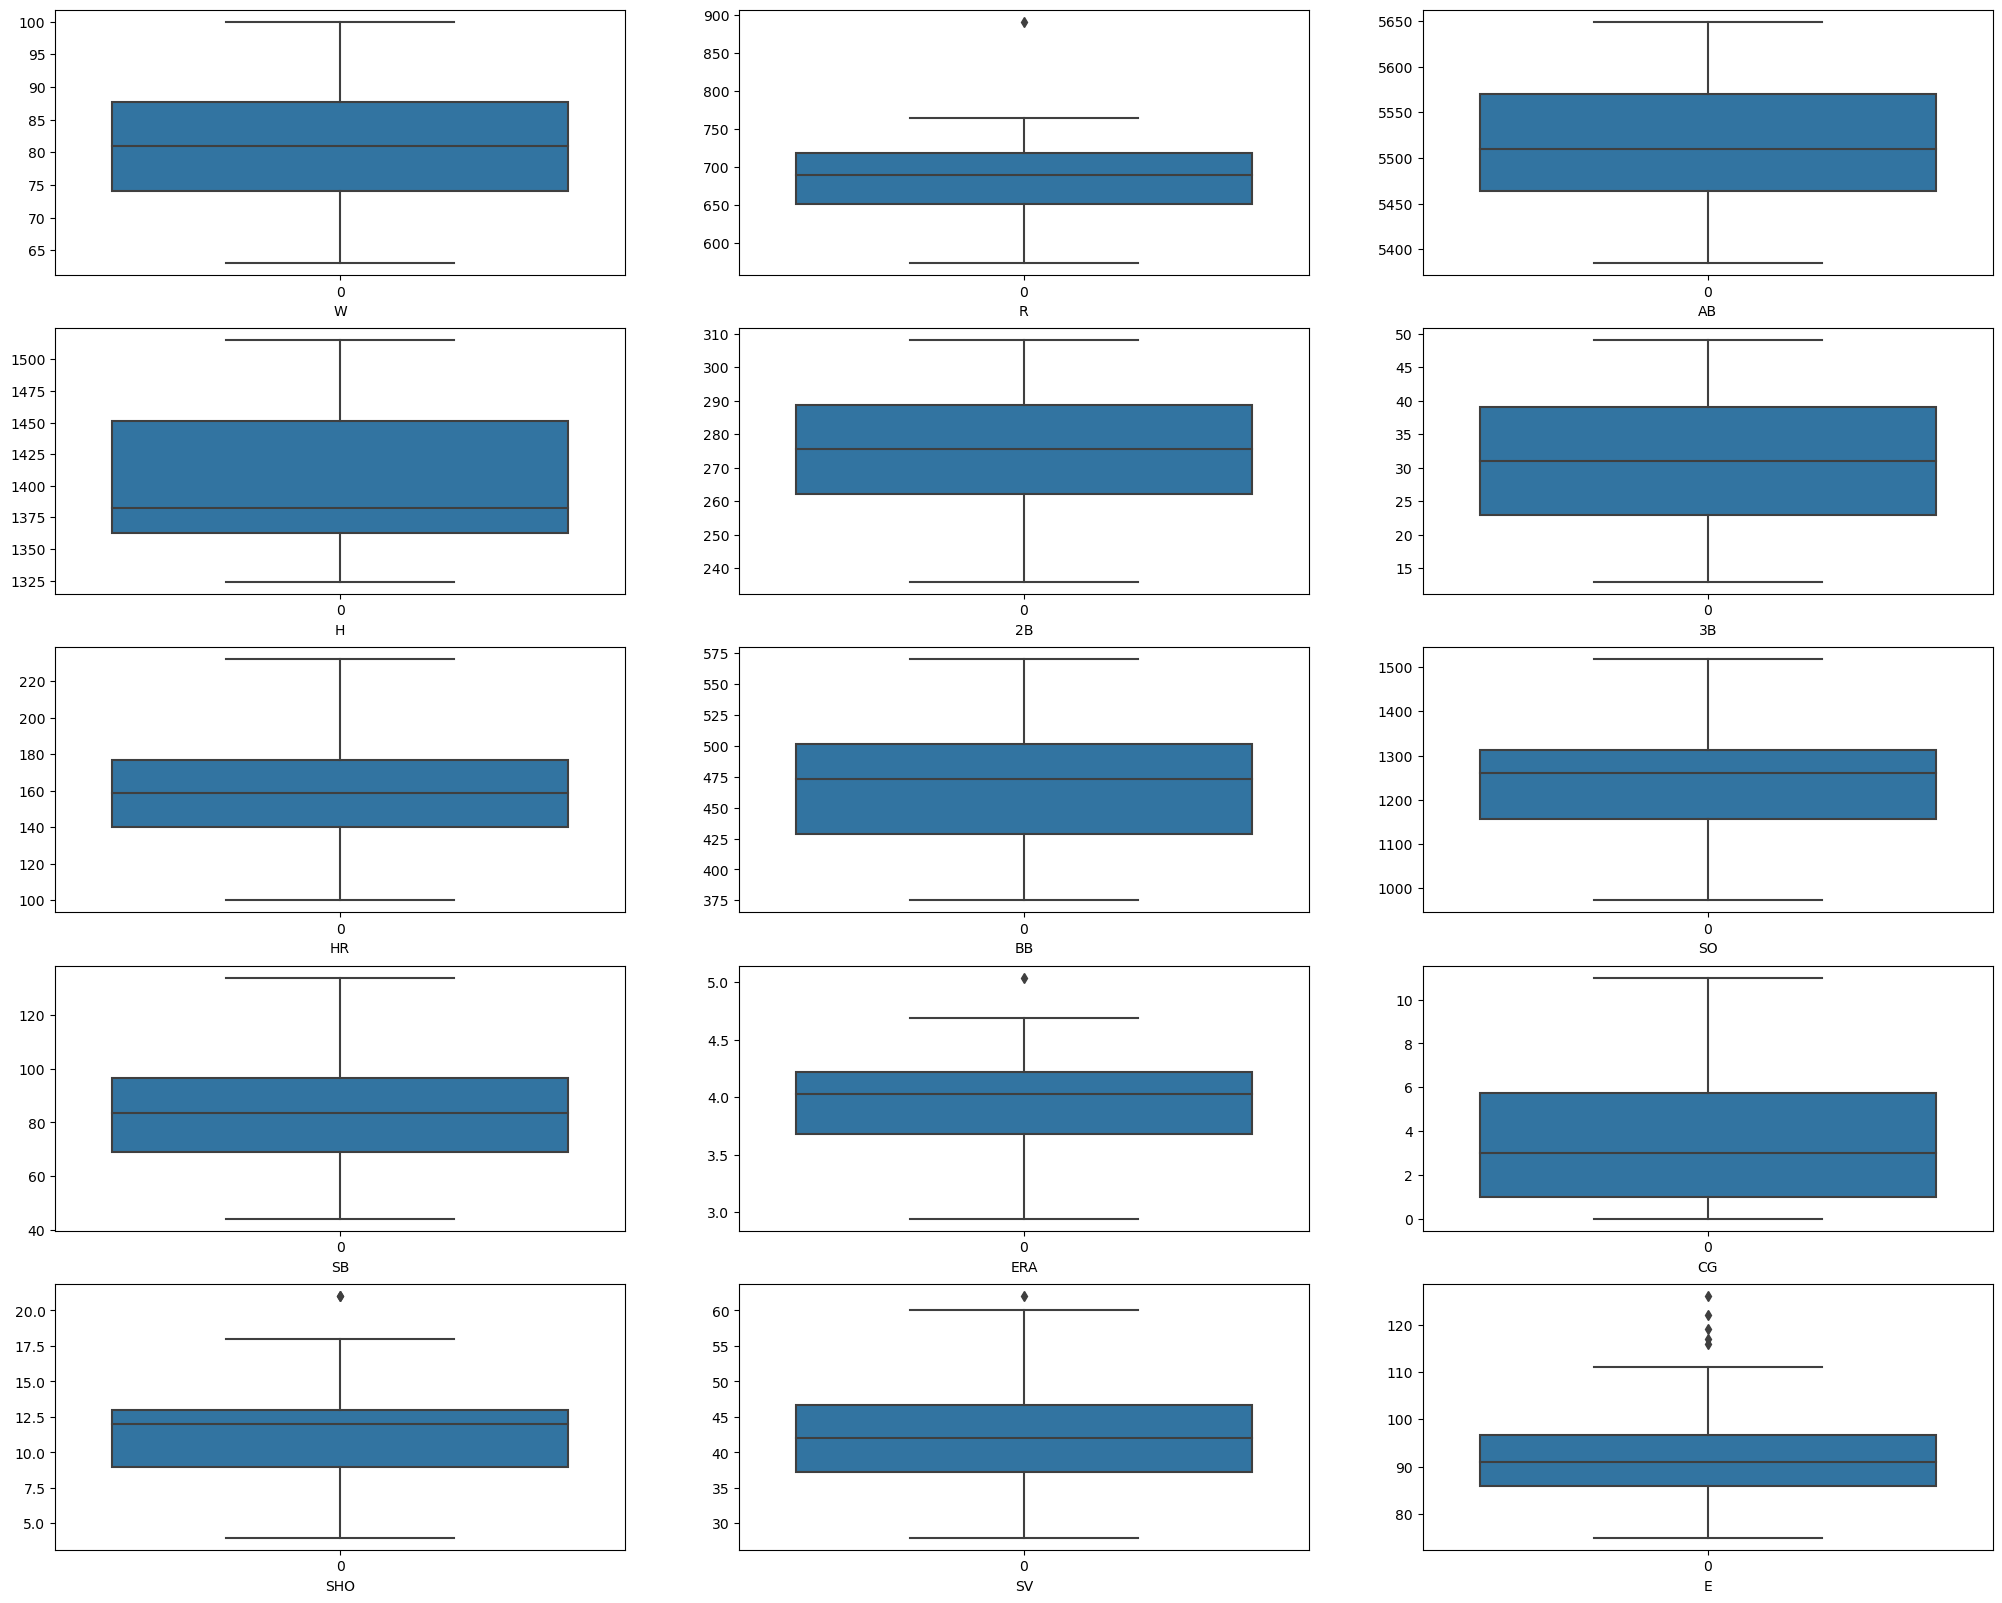

In [35]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    plt.subplot(5,3,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

let us remove the outliers using z score

In [36]:
shape=data.shape

In [37]:
from scipy.stats import zscore

In [38]:
Zscore=np.abs(zscore(data))

In [39]:
index=np.where(Zscore>3) #The data points outside the z score value of 3 is considered to be autlier

In [40]:
index=index[0]

In [41]:
data=data.drop(index=index)

In [42]:
data.shape

(29, 15)

We only lost 1 data points and cleaned our data also

In [43]:
data.reset_index(drop=True)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


All the preprocessing parts are over now let us make the model

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
x=data.drop(columns='W')
y=data['W'] #Dividing the dataset into features and label

In [46]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.617213,-0.570122,0.211006,1.757915


Let us see the variance inflation factor

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
for i in range(14):
    print(x.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('       ')

R
6.787762402286184
       
AB
4.98174310026316
       
H
8.569580757190774
       
2B
3.4161160535285524
       
3B
3.2395646472803783
       
HR
6.590924622596858
       
BB
3.0815597521994462
       
SO
2.106522473924663
       
SB
1.842527529511916
       
ERA
4.931065854446874
       
CG
2.649063414598936
       
SHO
3.2310294873277874
       
SV
3.0758654098861187
       
E
2.0396414588246703
       


The r and h having high vif scores 
Let us drop H and see the scores now

In [49]:
x_scaled=x_scaled.drop(columns='H')

In [50]:
for i in range(13):
    print(x.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('       ')

R
4.4281637493914605
       
AB
2.350073381486256
       
H
3.4110448497361117
       
2B
3.1917256444310347
       
3B
4.801655003830617
       
HR
2.635823417195252
       
BB
2.087109105407122
       
SO
1.6001462024521593
       
SB
4.311502739792131
       
ERA
2.267940654543183
       
CG
2.928226619702487
       
SHO
2.5885815516158357
       
SV
1.4017153791628423
       


All the columns have low vif scores 
Now let us make the model

In [51]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor

In [118]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,10000):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9731045168843563 6212


In [119]:
maxrs

6212

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs) #We used the best random state

In [121]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
knn=KNeighborsRegressor()

In [122]:
models=[rr,er,lr,gb,ad,bg,ri,ls,knn]

In [123]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model,' ',r2_score(y_test,pred))

RandomForestRegressor()   0.666315909090909
ExtraTreesRegressor()   0.6262860795454546
LinearRegression()   0.9731045168843563
GradientBoostingRegressor()   0.604639226335304
AdaBoostRegressor()   0.7093855218855217
BaggingRegressor()   0.6843371212121214
Ridge()   0.9479968718324817
LassoCV()   0.958869273461489
KNeighborsRegressor()   0.5881060606060602


In [130]:
#Here the dataset is very less already and with this less data dividing the dataset further may not give desired or accurate
#Results but still we will do the cross validation and use a cv of 2 which normally we use 5 or more
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=4).mean()) 

RandomForestRegressor() , 0.5054949290616134
ExtraTreesRegressor() , 0.54666775938046
LinearRegression() , 0.3383430972290207
GradientBoostingRegressor() , 0.23396337680109952
AdaBoostRegressor() , 0.5951083308486684
BaggingRegressor() , 0.44090236259474247
Ridge() , 0.5413849037323956
LassoCV() , 0.7073226043883384
KNeighborsRegressor() , 0.46349518384836963


With this much less data points it was sure that the models will perform poorly
Let us do grid search on the regression models which are lasso, ridge and the linear regression

In [131]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [91]:
lasso_cv=LassoCV(cv=5,random_state=42)

In [92]:
lasso_cv.fit(x_train,y_train)

LassoCV(cv=5, random_state=42)

In [97]:
lasso_cv.alpha_
pred=lasso_cv.predict(x_test)
r2_score(y_test,pred)

0.958869273461489

In [99]:
lasso=Lasso(alpha=lasso_cv.alpha_)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)

0.958869273461489

In [ ]:
#grid search for lasso

In [100]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid={'fit_intercept':[True,False],
            'precompute':[True,False],
            'copy_X':[True,False],
            'max_iter':list(range(600,1100,100)),
            'tol':list(np.arange(0.1,0.95,0.5)),
            'warm_start':[True,False],
            'positive':[True,False],
            'random_state':list(range(100,1000,100))
    
}

In [149]:
grid_search=GridSearchCV(estimator=Lasso(alpha=lasso_cv.alpha_),param_grid=param_grid,cv=2)

In [150]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=2, estimator=Lasso(alpha=0.6726231330309939),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [600, 700, 800, 900, 1000],
                         'positive': [True, False], 'precompute': [True, False],
                         'random_state': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900],
                         'tol': [0.1, 0.6], 'warm_start': [True, False]})

In [151]:
grid_search.best_estimator_

Lasso(alpha=0.6726231330309939, max_iter=600, precompute=True, random_state=100,
      tol=0.1, warm_start=True)

In [200]:
lasso=Lasso(alpha=lasso_cv.alpha_,max_iter=600,precompute=True,random_state=100,tol=0.1,warm_start=True)

In [203]:
lasso.fit(x_train,y_train)
r2_score(y_test,lasso.predict(x_test))

0.9647447230409134

Let us do the grid search for linearregression

In [142]:
param_grid={'fit_intercept':[True,False],
            'copy_X':[True,False],
            'positive':[True,False]
    
}

In [143]:
grid_search=GridSearchCV(estimator=LinearRegression(),param_grid=param_grid,cv=2)

In [144]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [146]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [147]:
lr=LinearRegression(copy_X=True,fit_intercept=True,positive=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2_score(y_test,pred)

0.7147459783098856

So as of now the best model has been the lasso by far
As the dataset is very small that is why only the regression model are able to perform good in this case rest all the models
are not performing well

In [204]:
import joblib

In [206]:
model=lasso

In [208]:
joblib.dump(lasso,'baseball.PKL')

['baseball.PKL']

We have also succesfully saved the model also which was lasso which after tuning had 96.5% accuracy which is great

Now we will try new things to do better

In [210]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [211]:
corr=data.corr()

<Axes: >

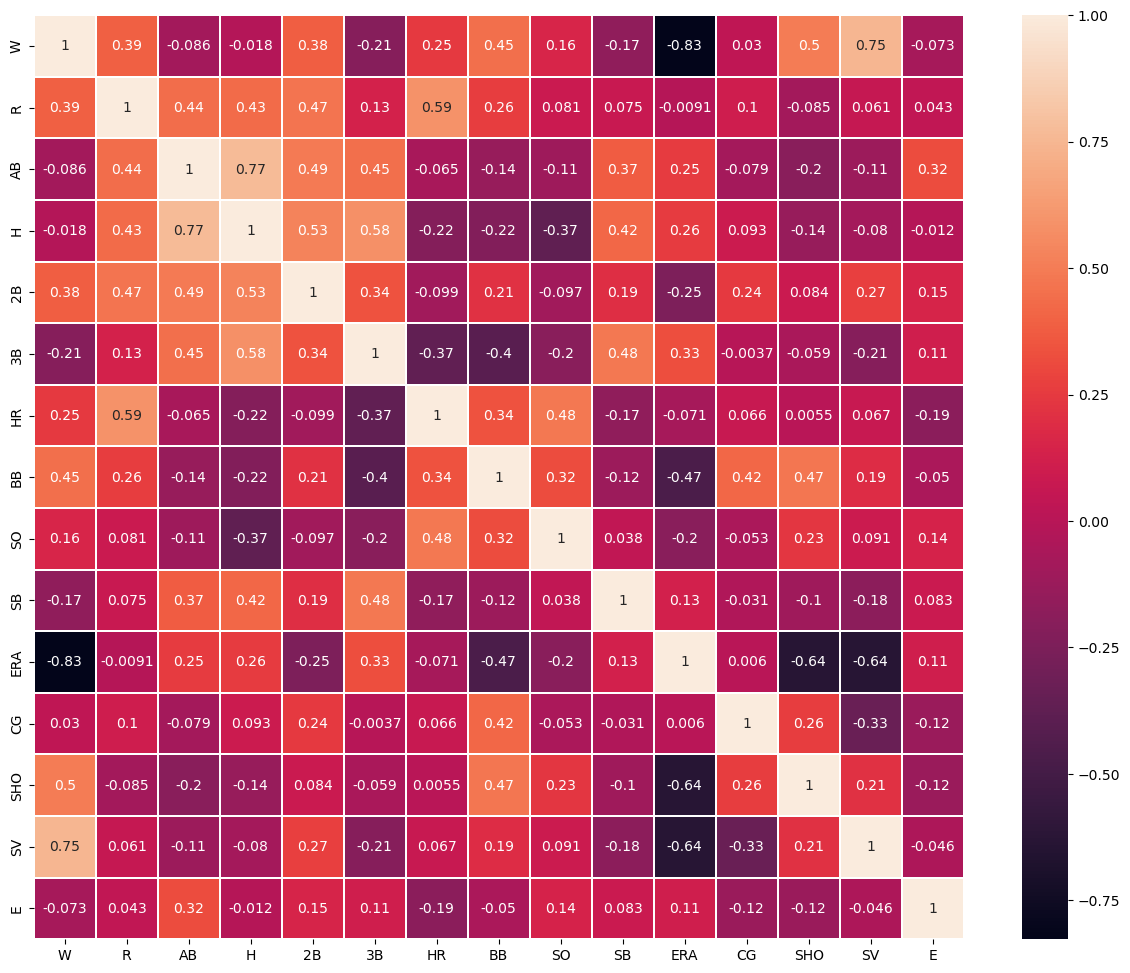

In [212]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,linewidths=0.1,annot=True)

As we have already deleted the features with very high related this time i want to make models using 
the features which have a significant relation with the label otherwise i will not use them 
This is my plan and let us see it works or not

In [216]:
corr['W'].sort_values()

ERA   -0.826952
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

We can see that the SO,CG,H,E,AB,SB have very less relation with the label w let us visualize and after that we will
delete them if found not related

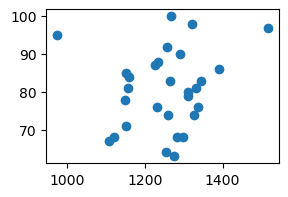

In [220]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['SO'],y=data['W'])

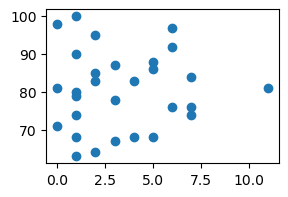

In [221]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['CG'],y=data['W'])

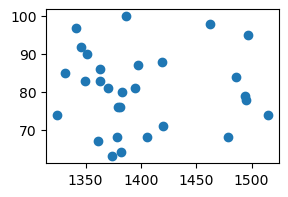

In [222]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['H'],y=data['W'])

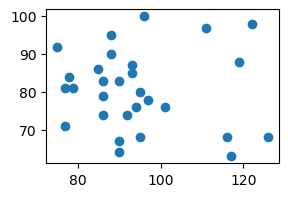

In [223]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['E'],y=data['W'])

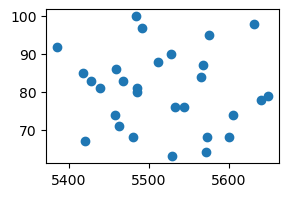

In [224]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['AB'],y=data['W'])

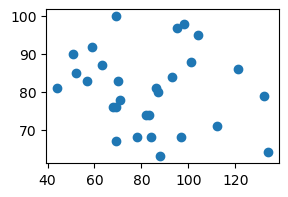

In [225]:
plt.figure(figsize=(3,2))
plt.scatter(x=data['SB'],y=data['W'])

AB and SO have a little relation with the label if not very high relation so in this case i will respect this relation
and i will keep them and delete the rest 4 found not related

In [226]:
columns_not_related=['SB','E','H','CG']

In [227]:
data=data.drop(columns=columns_not_related)

In [229]:
data.head()

,W,R,AB,2B,3B,HR,BB,SO,ERA,SHO,SV
0,95,724,5575,300,42,139,383,973,3.73,8,56
1,83,696,5467,277,44,156,439,1264,4.07,12,45
2,81,669,5439,303,29,141,533,1157,3.67,10,38
3,76,622,5533,260,27,136,404,1231,3.98,9,37
4,74,689,5605,289,49,151,455,1259,4.64,12,35


I know that we might have lost some info but it is just a part of the hit and trail i am doing

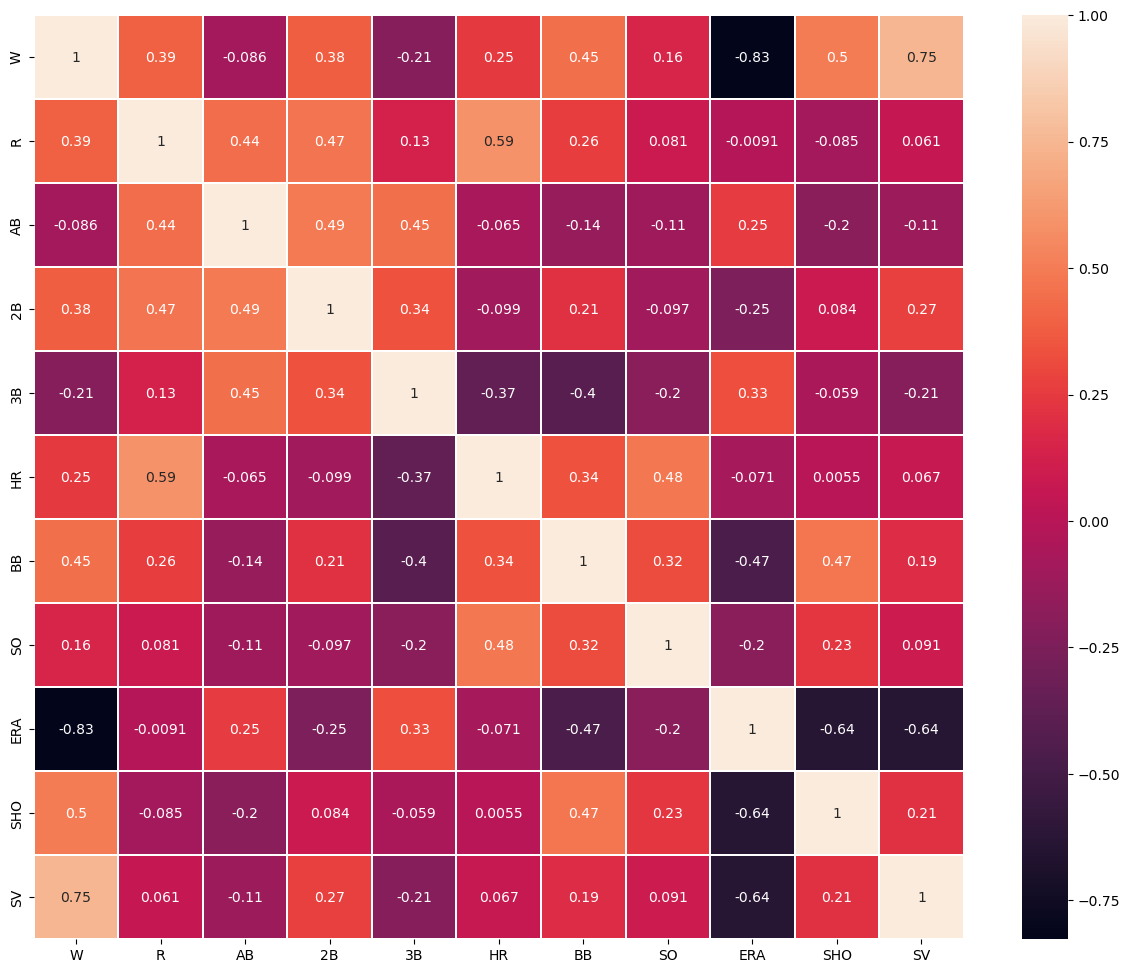

In [231]:
corr=data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,linewidths=0.1,annot=True)
plt.show()

In [233]:
corr['W'].sort_values()

ERA   -0.826952
3B    -0.206737
AB    -0.085780
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

In [234]:
x=data.drop(columns='W')
y=data['W']

In [235]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,R,AB,2B,3B,HR,BB,SO,ERA,SHO,SV
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,-0.511388,-0.813262,1.643157
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,0.238952,0.159299,0.211006
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,-0.643801,-0.326982,-0.700362
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,0.040333,-0.570122,-0.830557
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,1.496876,0.159299,-1.090948
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,0.150677,-1.785822,0.601593
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,0.194815,-0.326982,-0.049384
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,-0.489319,0.159299,2.163939
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,0.768604,-0.326982,-0.439971
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.614123,-0.570122,0.211006


In [236]:
x_scaled.shape

(29, 10)

In [237]:
for i in range(10):
    print(x_scaled.columns[i])
    print(variance_inflation_factor(x_scaled,i))
    print('      ')

R
4.119699509581016
      
AB
1.931598775780778
      
2B
2.611927293693355
      
3B
2.571294108543345
      
HR
4.029180582132392
      
BB
2.2670008611965593
      
SO
1.639294959379709
      
ERA
3.912510375257308
      
SHO
2.540743416502428
      
SV
1.9567847788331634
      


SO no high vif score here let us see the model building here and how it works

In [238]:
maxACC=0
maxrs=0
for i in range(1,10000):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.974351137068238 5931


In [239]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs) #We used the best random state

For the linear regression this is seems to be working very well now let us see this for other models as well
The models have already been defined so we do not need to import anything from scratch

In [240]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model,' ',r2_score(y_test,pred))

RandomForestRegressor()   0.8468125901442309
ExtraTreesRegressor()   0.8729330078125
LinearRegression()   0.974351137068238
GradientBoostingRegressor()   0.7473743617089564
AdaBoostRegressor()   0.8036448240654435
BaggingRegressor()   0.7376802884615384
Ridge()   0.9891851757503641
LassoCV()   0.9666002516122426
KNeighborsRegressor()   0.7128004807692305


This time we can clealy see a better score for all the models and for the models without linear regression also
Now let us do cross validation
We know the scores will drop drastically but still we have to do it

In [250]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=4).mean()) 

RandomForestRegressor() , 0.5241491481194438
ExtraTreesRegressor() , 0.5637318045563129
LinearRegression() , 0.5833839252865067
GradientBoostingRegressor() , 0.3610068495068199
AdaBoostRegressor() , 0.5803975740662796
BaggingRegressor() , 0.4450276908169865
Ridge() , 0.6572703115915
LassoCV() , 0.7070207518167877
KNeighborsRegressor() , 0.3984308533095998


This time we can see that there is no minus score for any models
The models are performing good 

Let us do the tuning now

This time we will do it for ridge if it does not performs well than for lasso we will do

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV

Let us find the best alpha which we will use for the ridge

In [255]:
ridge_cv=RidgeCV()
ridge_cv.fit(x_train,y_train)
ridge_cv.alpha_

1.0

In [256]:
r2_score(y_test,ridge_cv.predict(x_test))

0.9891851757503662

The performance of ridge here is very good to be honest

In [336]:
param_grid={'fit_intercept':[True,False],
            'copy_X':[True,False],
            'max_iter':list(range(400,1100,100)),
            'tol':list(np.arange(0.1,0.95,0.5)),
            'positive':[True,False],
            'random_state':list(range(100,1000,100))
    
}

In [345]:
grid_search=GridSearchCV(estimator=Ridge(alpha=ridge_cv.alpha_),param_grid=param_grid,cv=4)

In [346]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [400, 500, 600, 700, 800, 900, 1000],
                         'positive': [True, False],
                         'random_state': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900],
                         'tol': [0.1, 0.6]})

In [347]:
grid_search.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'max_iter': 400,
 'positive': False,
 'random_state': 100,
 'tol': 0.1}

In [341]:
ridge=Ridge(copy_X=True,fit_intercept=True,max_iter=400,positive=False,random_state=100,tol=0.1)

In [348]:
ridge.fit(x_train,y_train)

Ridge(max_iter=400, random_state=100, tol=0.1)

In [349]:
r2_score(y_test,ridge.predict(x_test))

0.9891851757503641

this is out best model till now so let us save this

In [352]:
joblib.dump(ridge,'baseball2.PKL')

['baseball2.PKL']

Now let us tune the parameters for the linearregression

In [354]:
param_grid={'fit_intercept':[True,False],
            'copy_X':[True,False],
            'positive':[True,False]
    
}

In [ ]:
#this linear regression is a simple model which does not has many parameters

In [389]:
grid_search=GridSearchCV(estimator=LinearRegression(),param_grid=param_grid,cv=10)

In [390]:
grid_search.fit(x_scaled,y)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [391]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [392]:
lr=LinearRegression(copy_X=True,fit_intercept=True,positive=False)

In [393]:
lr.fit(x_train,y_train)

LinearRegression()

In [394]:
r2_score(y_test,lr.predict(x_test))

0.974351137068238

SO this time the linear regression is also performing well

Conclusion for this whole project-
1.At first we made the model using all the possible fetures in which we also used the features which were not significantly
related to the label. The regression models were performing good the linear regression had an r2 score of 0.92 while the lasso
had the best accuracy of 96.5 after all the tunings also

2.In the second time we used the features which were significanyly related to the label and time time we also saw a significant change.All the model including the regression models and the other model were having a better score
The linear regression had a score of 0.972 and the ridge had te highest with 0.989 which is close to perfect even for this small
dataset

Thanks sir.